In [3]:
from bs4 import BeautifulSoup # this is a library to parse websites
import numpy as np
import requests
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
# we are trying to extract the links from this page
url ='https://data.gcoos.org/data/waf/nc_by_platform/2022/federal/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
# 'a' are all link elements
links = soup.find_all('a')


In [6]:
all_hrefs = [a.get('href') for a in soup.find_all('a')] # get the href bit from all the links


In [7]:
nc_hrefs = [ref for ref in all_hrefs if '.nc' in ref] # the links that end with .nc


In [8]:
stations = np.unique([el.split('_')[1] for el in nc_hrefs]) # split a line at '_' and get the 2nd section
                                                            # get unique names - remove repetitions


In [9]:
# lets get rid of the ioos-station- part
# split by '-', take from 3rd element forward (can be 2 or 3 or more), and then join again
stIDs = ['-'.join(s.split('-')[2:]) for s in stations]

In [10]:
def download_file(url):
    local_filename = url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)
    print(local_filename)

In [ ]:
# dowload
STID='NOAA-NOS-CO-OPS-8764314'
for y in range(2019, 2022):
    for m in range(1,13):
        path = f'https://data.gcoos.org/data/waf/nc_by_platform/{y}/ldn/gcoos_ioos-station-{STID}_{y}_{m:02d}.nc'
        try:
            download_file(path)
        except:
            print(f'Path not found: {path}')

Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2019/ldn/gcoos_ioos-station-wmo-42394_2019_01.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2019/ldn/gcoos_ioos-station-wmo-42394_2019_02.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2019/ldn/gcoos_ioos-station-wmo-42394_2019_03.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2019/ldn/gcoos_ioos-station-wmo-42394_2019_04.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2019/ldn/gcoos_ioos-station-wmo-42394_2019_05.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2019/ldn/gcoos_ioos-station-wmo-42394_2019_06.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2019/ldn/gcoos_ioos-station-wmo-42394_2019_07.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2019/ldn/gcoos_ioos-station-wmo-42394_2019_08.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2019/ldn/gcoos_ioos-station-wmo-42394_201

C:\Users\sripr\AppData\Local\Temp\ipykernel_28868\680901875.py:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
C:\Users\sripr\AppData\Local\Temp\ipykernel_28868\680901875.py:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()


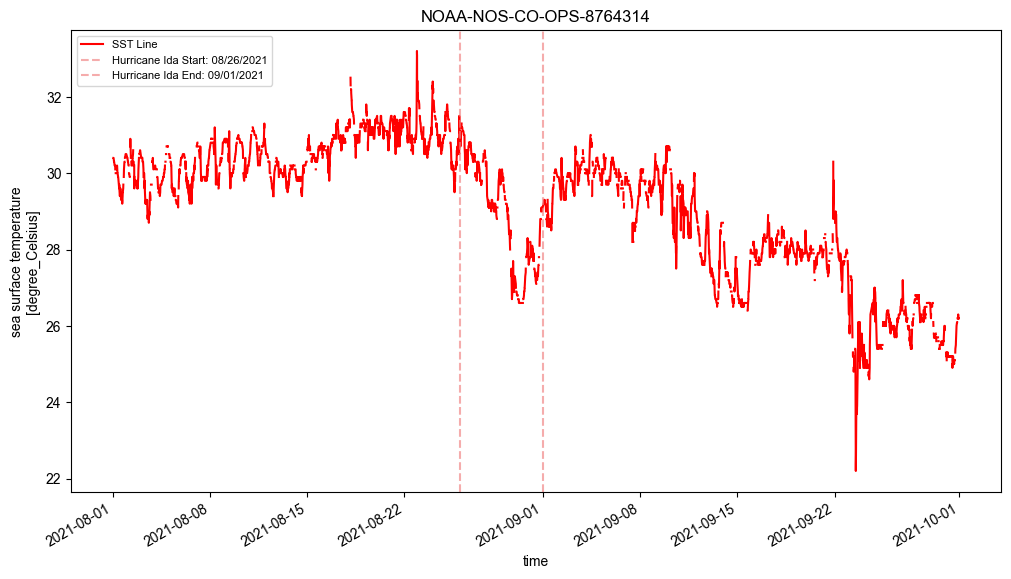

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

STID = 'NOAA-NOS-CO-OPS-8764314'
y = 2021
datasets = []
for m in range(8, 10):
    path = f'gcoos_ioos-station-{STID}_{y}_{m:02d}.nc'
    ds = xr.open_dataset(path)
    ds['time'] = ds.indexes['time'].to_datetimeindex()
    sst = ds['sea_surface_temperature_1'].where(ds['sea_surface_temp_qc_1_agg'] == 1)
    sst.name = 'sst'
    datasets.append(sst)
ds_full = xr.merge(datasets)

fig, ax = plt.subplots(figsize=(12, 6))
ds_full.sst.plot(ax=ax, label='SST Line', color='red')

cruise_dates = {
    '2021-08-26': 'Hurricane Ida Start: 08/26/2021',
    '2021-09-01': 'Hurricane Ida End: 09/01/2021'
}
for cruise_date, label_text in cruise_dates.items():
    ax.axvline(x=pd.to_datetime(cruise_date), color='lightcoral', linestyle='--', alpha=0.65, label=label_text)

ax.legend(loc='upper left', fontsize=8)
plt.title(STID)
plt.show()


C:\Users\sripr\AppData\Local\Temp\ipykernel_28868\2165691454.py:12: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds1['time'] = ds1.indexes['time'].to_datetimeindex()
C:\Users\sripr\AppData\Local\Temp\ipykernel_28868\2165691454.py:12: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds1['time'] = ds1.indexes['time'].to_datetimeindex()


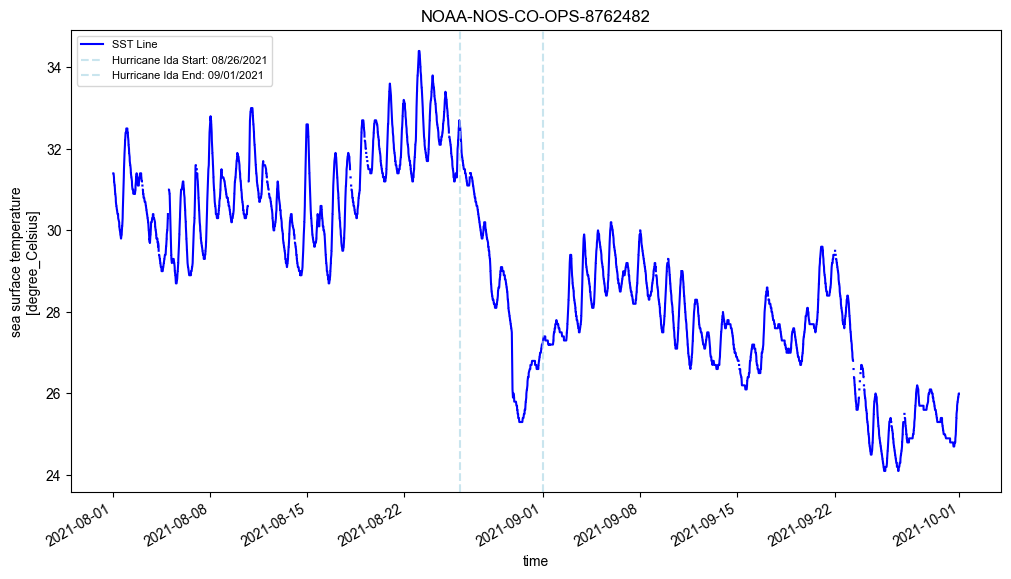

In [362]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

STID1 = 'NOAA-NOS-CO-OPS-8762482'
y = 2021
datasets1 = []

for m in range(8, 10):
    path1 = f'gcoos_ioos-station-{STID1}_{y}_{m:02d}.nc'  # Full path to your NetCDF file
    ds1 = xr.open_dataset(path1)
    ds1['time'] = ds1.indexes['time'].to_datetimeindex() 
    sst1 = ds1['sea_surface_temperature_1'].where(ds1['sea_surface_temp_qc_1_agg'] == 1)
    sst1.name = 'sst1'  # Assign a name
    datasets1.append(sst1)

ds_full1 = xr.merge(datasets1)

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the merged dataset's 'sst1' variable
ds_full1['sst1'].plot(ax=ax, label='SST Line', color='blue')

cruise_dates = {
    '2021-08-26': 'Hurricane Ida Start: 08/26/2021',
    '2021-09-01': 'Hurricane Ida End: 09/01/2021'
}

for cruise_date, label_text in cruise_dates.items():
    ax.axvline(x=pd.to_datetime(cruise_date), color='lightblue', linestyle='--', alpha=0.65, label=label_text)

ax.legend(loc='upper left', fontsize=8)
plt.title(STID1)
plt.show()


C:\Users\sripr\AppData\Local\Temp\ipykernel_28868\2538647338.py:12: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds2['time'] = ds2.indexes['time'].to_datetimeindex()
C:\Users\sripr\AppData\Local\Temp\ipykernel_28868\2538647338.py:12: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds2['time'] = ds2.indexes['time'].to_datetimeindex()


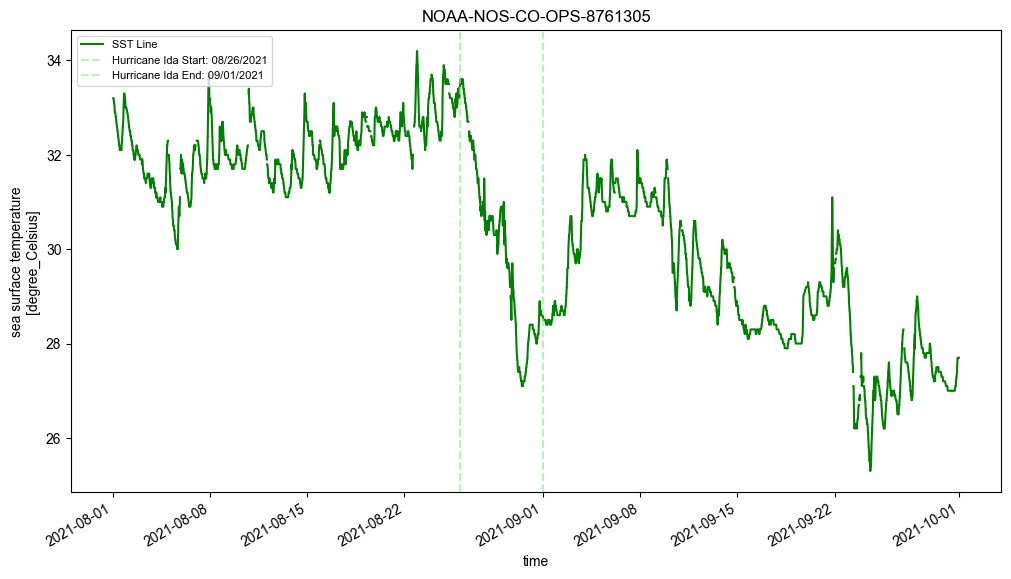

In [363]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

STID2 = 'NOAA-NOS-CO-OPS-8761305'  # Correct variable name
y = 2021
datasets2 = []

for m in range(8, 10):
    path2 = f'gcoos_ioos-station-{STID2}_{y}_{m:02d}.nc'  # Full path to your NetCDF file
    ds2 = xr.open_dataset(path2)
    ds2['time'] = ds2.indexes['time'].to_datetimeindex() 
    sst2 = ds2['sea_surface_temperature_1'].where(ds2['sea_surface_temp_qc_1_agg'] == 1)
    sst2.name = 'sst2'  # Assign a name
    datasets2.append(sst2)

ds_full2 = xr.merge(datasets2)

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the merged dataset's 'sst2' variable
ds_full2['sst2'].plot(ax=ax, label='SST Line', color='green')

cruise_dates = {
    '2021-08-26': 'Hurricane Ida Start: 08/26/2021',
    '2021-09-01': 'Hurricane Ida End: 09/01/2021'
}

for cruise_date, label_text in cruise_dates.items():
    ax.axvline(x=pd.to_datetime(cruise_date), color='lightgreen', linestyle='--', alpha=0.65, label=label_text)

ax.legend(loc='upper left', fontsize=8)
plt.title(STID2)
plt.show()


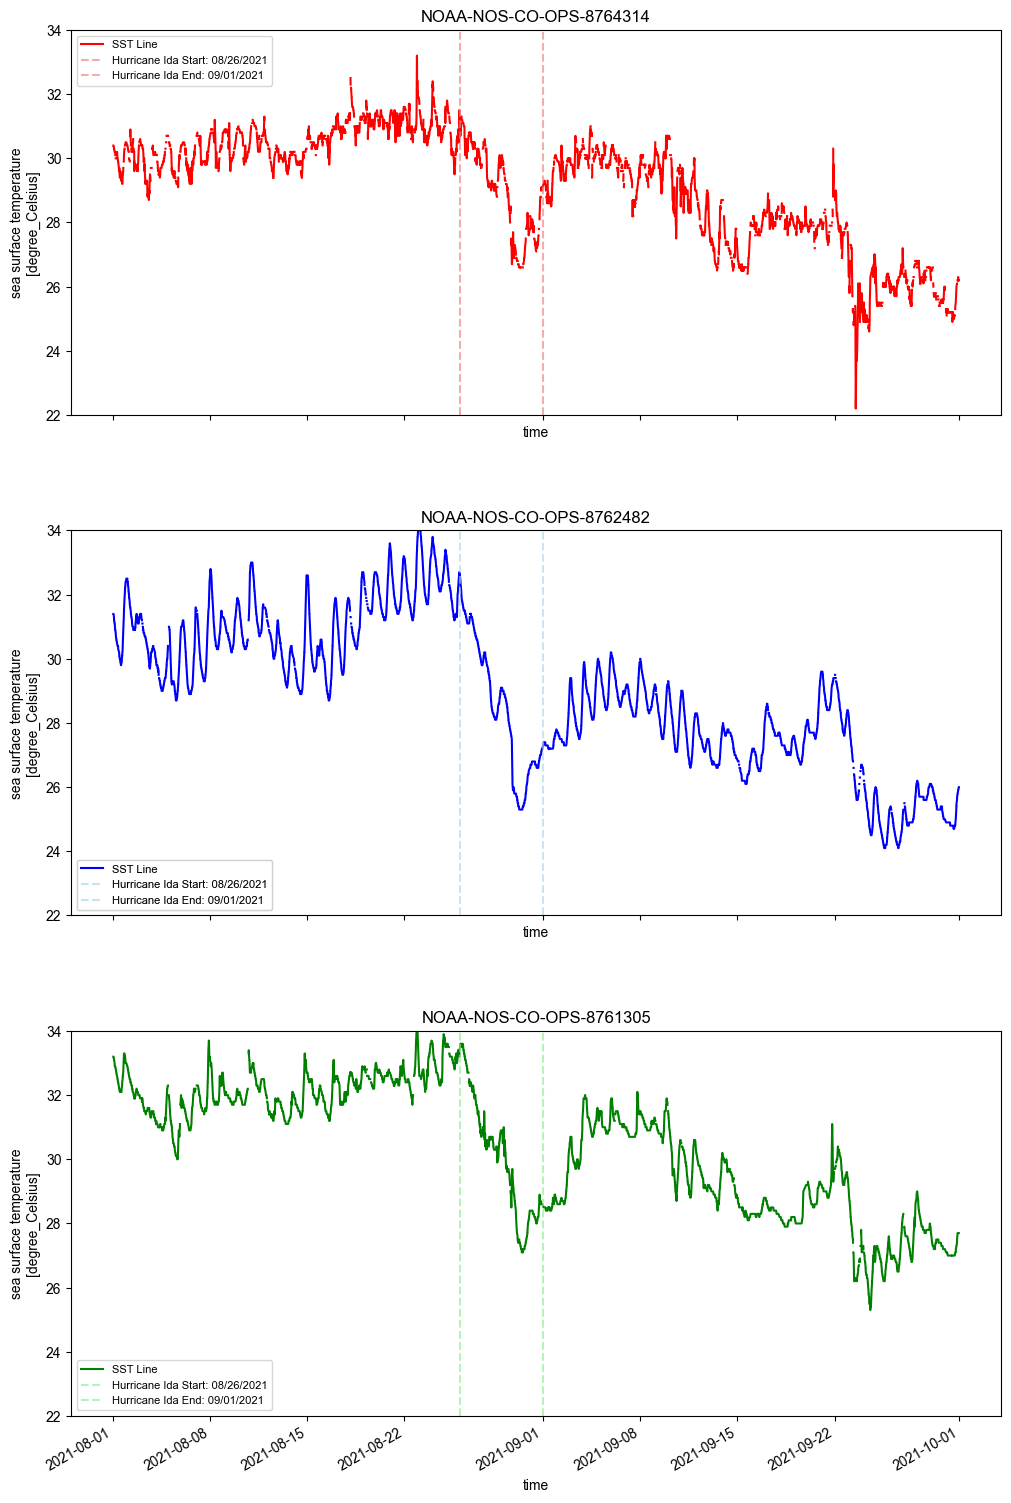

In [364]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18), sharex=True)  # Creating subplots with shared x-axis

# Plotting the first dataset
ds_full.sst.plot(ax=ax1, label='SST Line', color='red')
for cruise_date, label_text in cruise_dates.items():
    ax1.axvline(x=pd.to_datetime(cruise_date), color='lightcoral', linestyle='--', alpha=0.65, label=label_text)
ax1.legend(loc='upper left', fontsize=8)
ax1.set_title(STID)
ax1.set_ylim(22, 34)  # Set y-axis limits

# Plotting the second dataset
ds_full1['sst1'].plot(ax=ax2, label='SST Line', color='blue')
for cruise_date, label_text in cruise_dates.items():
    ax2.axvline(x=pd.to_datetime(cruise_date), color='lightblue', linestyle='--', alpha=0.65, label=label_text)
legend2 = ax2.legend(loc='lower left', fontsize=8)  # Set legend for the second plot
ax2.add_artist(legend2)  # Add the second legend without overriding the first
ax2.set_title(STID1)
ax2.set_ylim(22, 34) # Set y-axis limits

# Plotting the third dataset
ds_full2['sst2'].plot(ax=ax3, label='SST Line', color='green')
for cruise_date, label_text in cruise_dates.items():
    ax3.axvline(x=pd.to_datetime(cruise_date), color='lightgreen', linestyle='--', alpha=0.65, label=label_text)
ax3.legend(loc='lower left', fontsize=8)  # Set legend for the third plot
ax3.set_title(STID2)
ax3.set_ylim(22, 34) # Set y-axis limits

plt.subplots_adjust(hspace=0.3)  # Adjusting vertical spacing between subplots

plt.show()


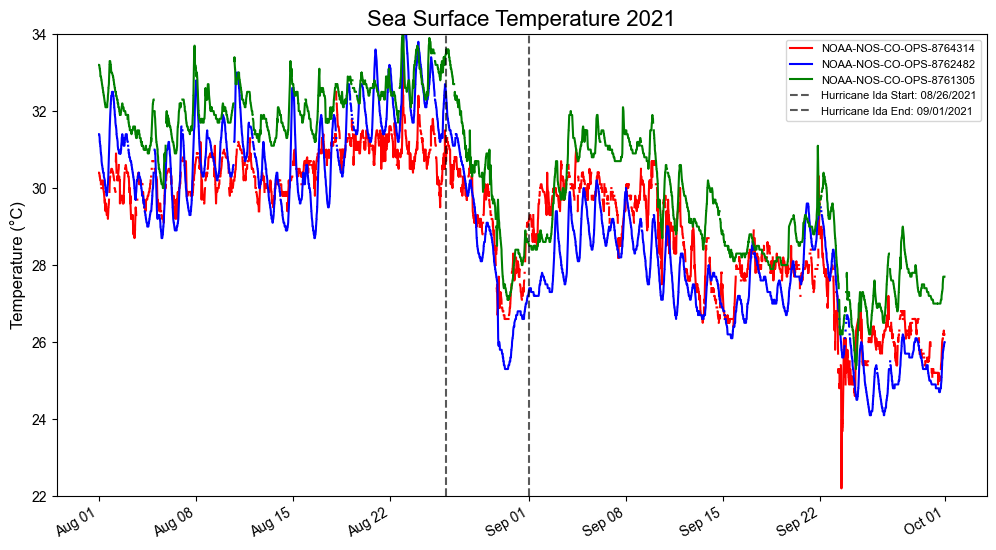

In [373]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the first dataset
ds_full.sst.plot(ax=ax, label=STID, color='red')

# Plotting the second dataset
ds_full1['sst1'].plot(ax=ax, label=STID1, color='blue')

# Plotting the third dataset
ds_full2['sst2'].plot(ax=ax, label=STID2, color='green')

# Plotting the storm lines in black
cruise_dates_Ida = {
    '2021-08-26': 'Hurricane Ida Start: 08/26/2021',
    '2021-09-01': 'Hurricane Ida End: 09/01/2021'
}

for cruise_date, label_text in cruise_dates_Ida.items():
    ax.axvline(x=pd.to_datetime(cruise_date), color='black', linestyle='--', alpha=0.65, label=label_text)

ax.legend(loc='upper right', fontsize=8)
ax.set_title("Sea Surface Temperature 2021", fontsize=16)  # Larger title font size
ax.set_ylabel("Temperature (°C)", fontsize=12)  # Y-axis label
ax.set_ylim(22, 34)  # Set y-axis limits

# Format x-axis labels to display month and day (e.g., "Aug 8")
date_form = mdates.DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_form)

ax.set_xlabel('')  # Remove x-axis label

plt.show()


In [65]:
# Assuming storm_start_time is the start time of Hurricane Barry
storm_start_time = pd.to_datetime('2021-08-26')

# Extract the y-values for each dataset at the storm start time
y_value_stid = ds_full.sst.sel(time=storm_start_time, method='nearest').values
y_value_stid1 = ds_full1['sst1'].sel(time=storm_start_time, method='nearest').values
y_value_stid2 = ds_full2['sst2'].sel(time=storm_start_time, method='nearest').values

print("Y-value at storm start time for STID:", y_value_stid)
print("Y-value at storm start time for STID1:", y_value_stid1)
print("Y-value at storm start time for STID2:", y_value_stid2)


Y-value at storm start time for STID: 31.0
Y-value at storm start time for STID1: 32.5
Y-value at storm start time for STID2: 33.5


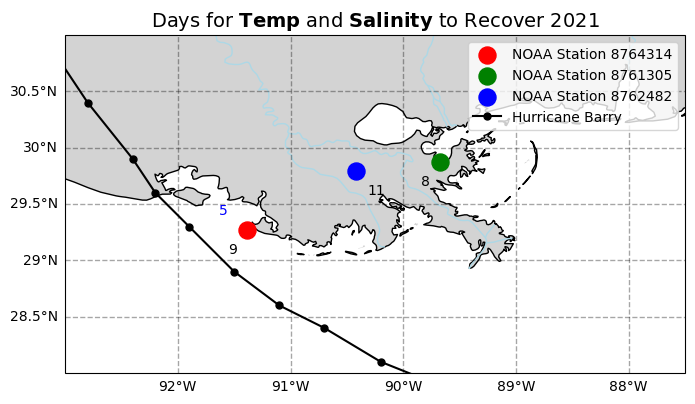

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(8, 8))  # Adjust the figure size
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Scatter points with adjusted z-order and labels
stations = {
    (-91.3839, 29.2675): "NOAA Station 8764314",
    (-89.6732, 29.8681): "NOAA Station 8761305",
    (-90.4202, 29.7886): "NOAA Station 8762482"
}

# Define colors for each station
colors = ['red', 'green', 'blue']

for i, (coords, label) in enumerate(stations.items()):
    ax.scatter(coords[0], coords[1], marker='o', s=150, color=colors[i], zorder=2, label=label)  # Increase marker size

latitude = [28.5, 28.1, 27.8, 27.7, 27.7, 27.7, 27.8, 27.9, 28.1, 28.4, 28.6, 28.9, 29.3, 29.6, 29.9, 30.4, 31.0, 31.6, 32.3, 33.0, 33.9, 34.7, 35.5, 36.3, 37.2]
longitude = [-86.5, -87.1, -87.6, -88.0, -88.4, -88.8, -89.2, -89.7, -90.2, -90.7, -91.1, -91.5, -91.9, -92.2, -92.4, -92.8, -93.2, -93.5, -93.6, -93.6, -93.6, -93.6, -93.5, -93.3, -92.9]

# Scatter plot of latitude and longitude
ax.plot(longitude, latitude, marker='o', markersize=5, color='black', linestyle='-', label='Hurricane Barry')
ax.text(-91.3839-0.17, 29.2675 - 0.17, s=9, ha='left', va='center')
ax.text(-91.3839-0.17, 29.2675 + 0.17, s=5, ha='right', color='blue', va='center')
ax.text(-89.6732-0.17, 29.8681 - 0.17, s=8, ha='left', va='center')
ax.text(-90.4202+0.1, 29.7886 - 0.17, s=11, ha='left', va='center')

# Setting the extent and adding map features
ax.set_extent([-93, -87.5, 28, 31], crs=ccrs.PlateCarree())  # Adjust the extent for zooming out
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Changing the river edge color to a lighter shade of blue
ax.add_feature(cfeature.NaturalEarthFeature(category='physical',
                                            name='rivers_lake_centerlines',
                                            edgecolor='lightblue',  # Adjust edge color to light blue
                                            facecolor='none',
                                            scale='10m'))

# Gridlines with updated labels
gl = ax.gridlines(draw_labels=True, linewidth=1, color='black', alpha=0.35, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Add Legend
ax.legend(loc='upper right', fontsize=10)

# Make "Temp" text bold
plt.title(r"Days for $\bf{Temp}$ and $\bf{Salinity}$ to Recover 2021", fontsize=14)

plt.show()


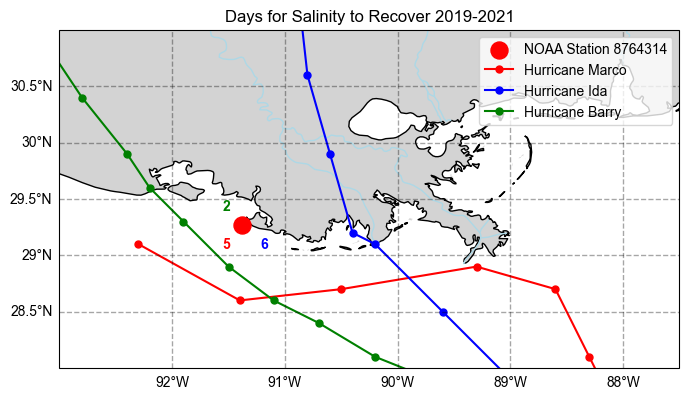

In [351]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(8, 8))  # Adjust the figure size
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Scatter points with adjusted z-order and labels
stations = {
    (-91.3839, 29.2675): "NOAA Station 8764314"
}

# Define colors for each station
colors = ['red', 'green', 'blue']

for i, (coords, label) in enumerate(stations.items()):
    ax.scatter(coords[0], coords[1], marker='o', s=150, color='red', zorder=2, label=label)  # Increase marker size

latitude = [14.1, 14.6, 15.3, 16.3, 17.4, 18.3, 19.2, 20.3, 21.3, 22.2, 23.2, 24.3, 25.3, 26.4, 27.3, 28.1, 28.7, 28.9, 28.7, 28.6, 29.1]
longitude = [-80.5, -81.8, -82.9, -83.7, -84.2, -84.6, -85.1, -85.2, -85.5, -86.1, -86.7, -87.2, -87.4, -87.6, -87.9, -88.3, -88.6, -89.3, -90.5, -91.4, -92.3]

latitude1 = [16.5, 17.4, 18.3, 19.4, 20.4, 21.5, 22.4, 22.6, 23.5, 24.4, 25.6, 26.7, 27.6, 28.5, 29.1, 29.2, 29.9, 30.6, 31.5, 32.2, 33.0, 33.8, 34.4, 35.1, 35.8, 36.7, 37.7, 39.0, 39.8, 40.6, 41.4, 43.3, 45.4, 46.6, 47.5, 48.6, 48.8, 48.7, 47.5, 46.6]
longitude1 = [-78.9, -79.5, -80.2, -80.9, -81.7, -82.6, -83.2, -83.5, -84.7, -85.7, -86.6, -87.6, -88.7, -89.6, -90.2, -90.4, -90.6, -90.8, -90.9, -90.5, -90.0, -89.4, -88.4, -87.1, -85.5, -83.6, -81.5, -78.5, -75.6, -72.8, -69.7, -67.2, -64.7, -63.6, -62.7, -62.4, -63.1, -63.9, -63.9, -63.5]

latitude2 = [28.5, 28.1, 27.8, 27.7, 27.7, 27.7, 27.8, 27.9, 28.1, 28.4, 28.6, 28.9, 29.3, 29.6, 29.9, 30.4, 31.0, 31.6, 32.3, 33.0, 33.9, 34.7, 35.5, 36.3, 37.2]
longitude2 = [-86.5, -87.1, -87.6, -88.0, -88.4, -88.8, -89.2, -89.7, -90.2, -90.7, -91.1, -91.5, -91.9, -92.2, -92.4, -92.8, -93.2, -93.5, -93.6, -93.6, -93.6, -93.6, -93.5, -93.3, -92.9]

# Scatter plot of latitude and longitude
ax.plot(longitude, latitude, marker='o', markersize=5, color='red', linestyle='-', label='Hurricane Marco')
ax.plot(longitude1, latitude1, marker='o', markersize=5, color='blue', linestyle='-', label='Hurricane Ida')
ax.plot(longitude2, latitude2, marker='o', markersize=5, color='green', linestyle='-', label='Hurricane Barry')
# Setting the extent and adding map features
ax.set_extent([-93, -87.5, 28, 31], crs=ccrs.PlateCarree())  # Adjust the extent for zooming out
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='lightgray')

ax.text(-91.3839-0.17, 29.2675 + 0.17, s=2,color='green',weight='bold', ha='left',va='center')
ax.text(-91.3839+0.17, 29.2675 - 0.17, s=6,color='blue',weight='bold', ha='left',va='center')
ax.text(-91.3839-0.17, 29.2675 - 0.17, s=5,color='red',weight='bold', ha='left',va='center')

# Changing the river edge color to a lighter shade of blue
ax.add_feature(cfeature.NaturalEarthFeature(category='physical',
                                            name='rivers_lake_centerlines',
                                            edgecolor='lightblue',  # Adjust edge color to light blue
                                            facecolor='none',
                                            scale='10m'))

# Gridlines with updated labels
gl = ax.gridlines(draw_labels=True, linewidth=1, color='black', alpha=0.35, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Add Legend
ax.legend(loc='upper right', fontsize=10)
plt.title("Days for Salinity to Recover 2019-2021")
plt.show()


C:\Users\sripr\AppData\Local\Temp\ipykernel_20728\219704086.py:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
C:\Users\sripr\AppData\Local\Temp\ipykernel_20728\219704086.py:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()


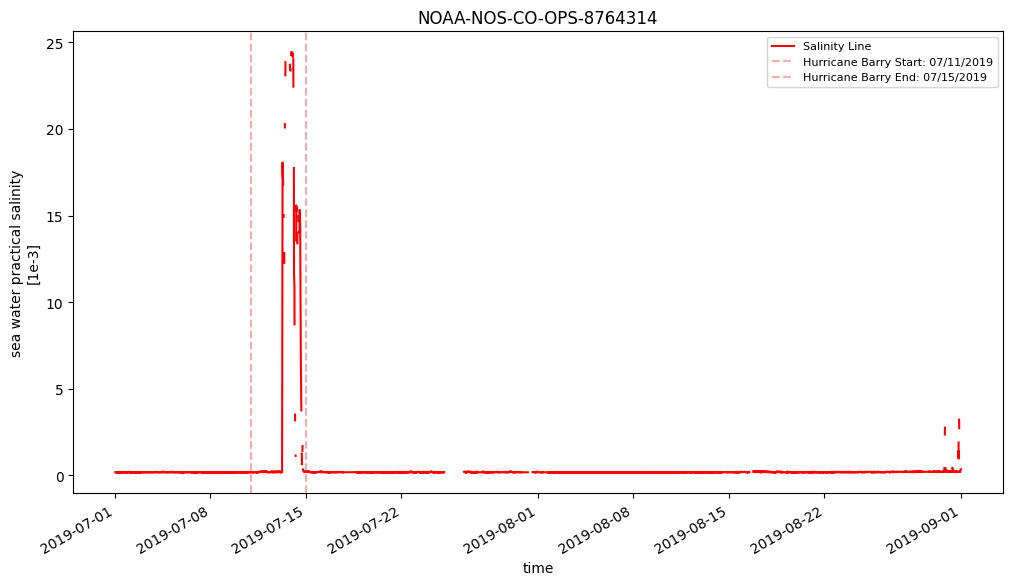

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

STID = 'NOAA-NOS-CO-OPS-8764314'
y = 2019
datasets = []
for m in range(7, 9):
    path = f'gcoos_ioos-station-{STID}_{y}_{m:02d}.nc'
    ds = xr.open_dataset(path)
    ds['time'] = ds.indexes['time'].to_datetimeindex()
    sst = ds['sea_water_practical_salinity_1'].where(ds['sal_qc_1_agg'] == 1)
    sst.name = 'sst'
    datasets.append(sst)
ds_full = xr.merge(datasets)

fig, ax = plt.subplots(figsize=(12, 6))
ds_full.sst.plot(ax=ax, label='Salinity Line', color='red')

cruise_dates = {
    '2019-07-11': 'Hurricane Barry Start: 07/11/2019',
    '2019-07-15': 'Hurricane Barry End: 07/15/2019'
}

for cruise_date, label_text in cruise_dates.items():
    ax.axvline(x=pd.to_datetime(cruise_date), color='lightcoral', linestyle='--', alpha=0.65, label=label_text)

ax.legend(loc='upper right', fontsize=8)
plt.title(STID)
plt.show()


C:\Users\sripr\AppData\Local\Temp\ipykernel_20728\3900573478.py:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
C:\Users\sripr\AppData\Local\Temp\ipykernel_20728\3900573478.py:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()


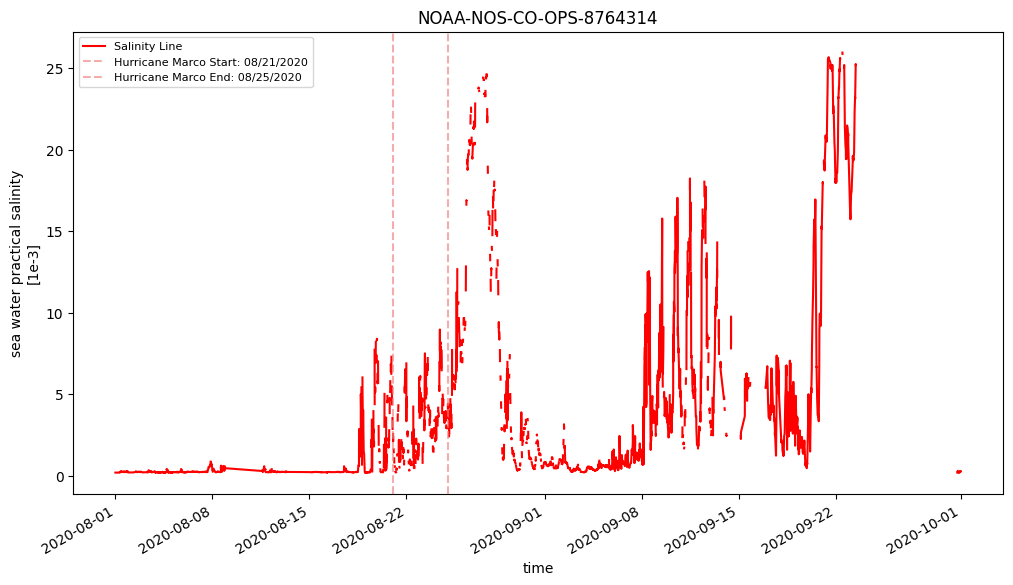

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

STID = 'NOAA-NOS-CO-OPS-8764314'
y = 2020
datasets = []
for m in range(8, 10):
    path = f'gcoos_ioos-station-{STID}_{y}_{m:02d}.nc'
    ds = xr.open_dataset(path)
    ds['time'] = ds.indexes['time'].to_datetimeindex()
    sst = ds['sea_water_practical_salinity_1'].where(ds['sal_qc_1_agg'] == 1)
    sst.name = 'sst'
    datasets.append(sst)
ds_full = xr.merge(datasets)

fig, ax = plt.subplots(figsize=(12, 6))
ds_full.sst.plot(ax=ax, label='Salinity Line', color='red')

cruise_dates = {
    '2020-08-21': 'Hurricane Marco Start: 08/21/2020',
    '2020-08-25': 'Hurricane Marco End: 08/25/2020'
}

for cruise_date, label_text in cruise_dates.items():
    ax.axvline(x=pd.to_datetime(cruise_date), color='lightcoral', linestyle='--', alpha=0.65, label=label_text)

ax.legend(loc='upper left', fontsize=8)
plt.title(STID)
plt.show()


C:\Users\sripr\AppData\Local\Temp\ipykernel_28868\3978976781.py:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
C:\Users\sripr\AppData\Local\Temp\ipykernel_28868\3978976781.py:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()


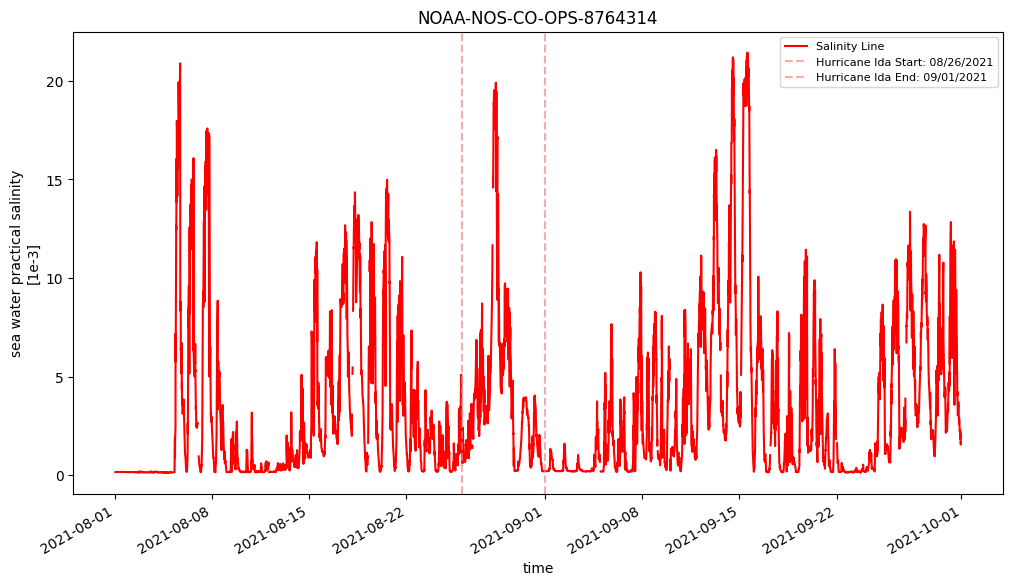

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

STID = 'NOAA-NOS-CO-OPS-8764314'
y = 2021
datasets = []
for m in range(8, 10):
    path = f'gcoos_ioos-station-{STID}_{y}_{m:02d}.nc'
    ds = xr.open_dataset(path)
    ds['time'] = ds.indexes['time'].to_datetimeindex()
    sst = ds['sea_water_practical_salinity_1'].where(ds['sal_qc_1_agg'] == 1)
    sst.name = 'sst'
    datasets.append(sst)
ds_full = xr.merge(datasets)

fig, ax = plt.subplots(figsize=(12, 6))
ds_full.sst.plot(ax=ax, label='Salinity Line', color='red')

cruise_dates = {
    '2021-08-26': 'Hurricane Ida Start: 08/26/2021',
    '2021-09-01': 'Hurricane Ida End: 09/01/2021'
}

for cruise_date, label_text in cruise_dates.items():
    ax.axvline(x=pd.to_datetime(cruise_date), color='lightcoral', linestyle='--', alpha=0.65, label=label_text)

ax.legend(loc='upper right', fontsize=8)
plt.title(STID)
plt.show()


C:\Users\sripr\AppData\Local\Temp\ipykernel_28868\298256705.py:14: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
C:\Users\sripr\AppData\Local\Temp\ipykernel_28868\298256705.py:14: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
C:\Users\sripr\AppData\Local\Temp\ipykernel_28868\298256705.py:14: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may l

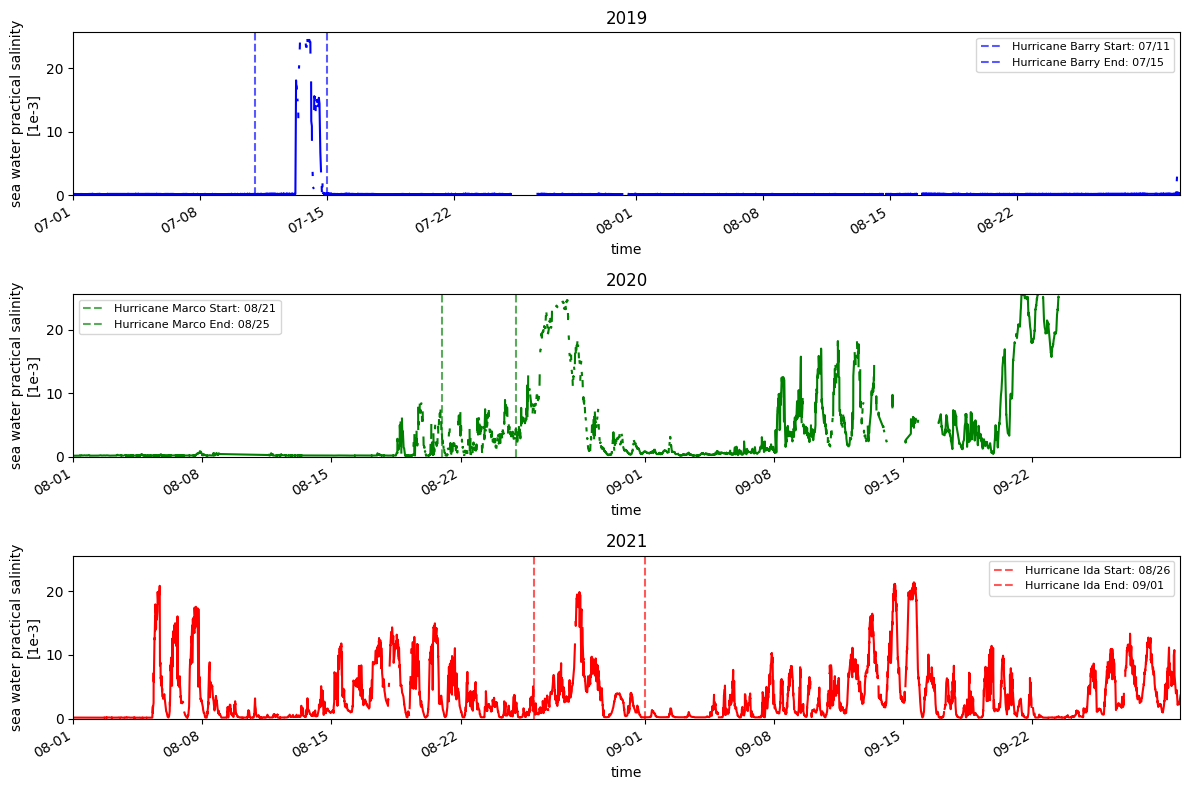

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import matplotlib.dates as mdates

STID = 'NOAA-NOS-CO-OPS-8764314'
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharey=True)

# Helper function to plot data
def plot_data(ax, year, month_start, month_end, cruise_dates, color):
    for m in range(month_start, month_end):
        path = f'gcoos_ioos-station-{STID}_{year}_{m:02d}.nc'
        ds = xr.open_dataset(path)
        ds['time'] = ds.indexes['time'].to_datetimeindex()
        sst = ds['sea_water_practical_salinity_1'].where(ds['sal_qc_1_agg'] == 1)
        sst.plot(ax=ax, label='', color=color)  # Empty label

    for cruise_date, label_text in cruise_dates.items():
        ax.axvline(x=pd.to_datetime(cruise_date), color=color, linestyle='--', alpha=0.65, label=label_text)

    ax.legend(loc='upper right', fontsize=8)
    ax.set_title(str(year))
    ax.set_ylim(0, ax.get_ylim()[1])  # Set y-axis minimum to 0

    # Format x-axis to show only month and day
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Plotting for 2019
ax = axes[0]
cruise_dates_2019 = {
    '2019-07-11': 'Hurricane Barry Start: 07/11',
    '2019-07-15': 'Hurricane Barry End: 07/15'
}
plot_data(ax, 2019, 7, 9, cruise_dates_2019, 'blue')
ax.set_xlim(pd.Timestamp('2019-07-01'), pd.Timestamp('2019-08-31'))  # Set x-axis limits for 2019

# Plotting for 2020
ax = axes[1]
cruise_dates_2020 = {
    '2020-08-21': 'Hurricane Marco Start: 08/21',
    '2020-08-25': 'Hurricane Marco End: 08/25'
}
plot_data(ax, 2020, 8, 10, cruise_dates_2020, 'green')
ax.set_xlim(pd.Timestamp('2020-08-01'), pd.Timestamp('2020-09-30'))  # Set x-axis limits for 2020
ax.legend(loc='upper left', fontsize=8)  # Adjust legend location for 2020

# Plotting for 2021
ax = axes[2]
cruise_dates_2021 = {
    '2021-08-26': 'Hurricane Ida Start: 08/26',
    '2021-09-01': 'Hurricane Ida End: 09/01'
}
plot_data(ax, 2021, 8, 10, cruise_dates_2021, 'red')
ax.set_xlim(pd.Timestamp('2021-08-01'), pd.Timestamp('2021-09-30'))  # Set x-axis limits for 2021

plt.tight_layout()
plt.show()


In [135]:
df = ds.to_dataframe()
df = df.drop('lat', axis=1)
ds

<xarray.Dataset>
Dimensions:                                           (time: 2678, depth: 1)
Coordinates:
  * time                                              (time) datetime64[ns] 2...
    lat                                               float32 29.27
    lon                                               float32 -91.38
  * depth                                             (depth) float32 0.0
Data variables: (12/174)
    platform                                          |S1 b''
    crs                                               int32 -2147483647
    water_level_instrument_1                          |S1 b''
    water_temperature_instrument_1                    |S1 b''
    wind_instrument_1                                 |S1 b''
    ocean_currents_instrument_1                       |S1 b''
    ...                                                ...
    dew_point_qc_1_loc                                (time) float64 9.0 ... 9.0
    dew_point_qc_1_rng                                (time) float64 9.0 ... 9.0
    dew_point_qc_1_clm                                (time) float64 9.0 ... 9.0
    dew_point_qc_1_spk                                (time) float64 9.0 ... 9.0
    dew_point_qc_1_rtc                                (time) float64 9.0 ... 9.0
    dew_point_qc_1_flt                                (time) float64 9.0 ... 9.0
Attributes: (12/82)
    gts_ingest:                      false
    ioos_ingest:                     false
    infoUrl:                         http://data.gcoos.org
    wmo_platform_code:               
    Conventions:                     CF-1.7, ACDD-1.3, IOOS-1.2, GCMD Earth S...
    id:                              gcoos_ioos-station-NOAA-NOS-CO-OPS-87643...
    ...                              ...
    instrument:                      Water level sensor - Water temperature p...
    keywords:                        EARTH SCIENCE > OCEANS > COASTAL PROCESS...
    time_coverage_start:             2021-09-01 00:42:00.000003
    time_coverage_end:               2021-09-30 22:54:00
    time_coverage_duration:          P29DT22H12M
    time_coverage_resolution:        PT6M

In [5]:
df.set_index('lon', inplace=True)
df.head(2678)

,platform,crs,water_level_instrument_1,water_temperature_instrument_1,wind_instrument_1,ocean_currents_instrument_1,salinity_instrument_1,air_pressure_instrument_1,air_temperature_instrument_1,chlorophyll_instrument_1,...,dew_point_temperature_1,dew_point_qc_1_agg,dew_point_qc_1_gap,dew_point_qc_1_syn,dew_point_qc_1_loc,dew_point_qc_1_rng,dew_point_qc_1_clm,dew_point_qc_1_spk,dew_point_qc_1_rtc,dew_point_qc_1_flt
lon,,,,,,,,,,,,,,,,,,,,,
-91.383904,b'',-2147483647,b'',b'',b'',b'',b'',b'',b'',b'',...,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
-91.383904,b'',-2147483647,b'',b'',b'',b'',b'',b'',b'',b'',...,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
-91.383904,b'',-2147483647,b'',b'',b'',b'',b'',b'',b'',b'',...,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
-91.383904,b'',-2147483647,b'',b'',b'',b'',b'',b'',b'',b'',...,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
-91.383904,b'',-2147483647,b'',b'',b'',b'',b'',b'',b'',b'',...,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-91.383904,b'',-2147483647,b'',b'',b'',b'',b'',b'',b'',b'',...,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
-91.383904,b'',-2147483647,b'',b'',b'',b'',b'',b'',b'',b'',...,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
-91.383904,b'',-2147483647,b'',b'',b'',b'',b'',b'',b'',b'',...,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


In [6]:
df.columns

Index(['platform', 'crs', 'water_level_instrument_1',
       'water_temperature_instrument_1', 'wind_instrument_1',
       'ocean_currents_instrument_1', 'salinity_instrument_1',
       'air_pressure_instrument_1', 'air_temperature_instrument_1',
       'chlorophyll_instrument_1',
       ...
       'dew_point_temperature_1', 'dew_point_qc_1_agg', 'dew_point_qc_1_gap',
       'dew_point_qc_1_syn', 'dew_point_qc_1_loc', 'dew_point_qc_1_rng',
       'dew_point_qc_1_clm', 'dew_point_qc_1_spk', 'dew_point_qc_1_rtc',
       'dew_point_qc_1_flt'],
      dtype='object', length=174)

In [11]:
df = df.loc[:, ['sea_water_practical_salinity_1', 'sea_surface_temperature_1','wind_speed_1','wind_gust_1','air_temperature_1']]
df_filled = df.fillna(0)
df_filled

,sea_water_practical_salinity_1,sea_surface_temperature_1,wind_speed_1,wind_gust_1,air_temperature_1
lon,,,,,
-91.383904,0.20,29.200001,4.4,5.0,29.5
-91.383904,0.20,29.200001,0.0,0.0,29.4
-91.383904,0.20,29.200001,0.0,0.0,29.5
-91.383904,0.20,29.200001,0.0,0.0,0.0
-91.383904,0.20,29.299999,5.6,6.5,29.6
...,...,...,...,...,...
-91.383904,2.08,26.200001,0.0,0.0,27.1
-91.383904,2.21,0.000000,0.0,0.0,0.0
-91.383904,1.61,26.200001,3.0,3.6,27.1


In [14]:
import sys, os
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as spc
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

Text(0.5, 1.0, 'Correlations Between Ocean Variables')

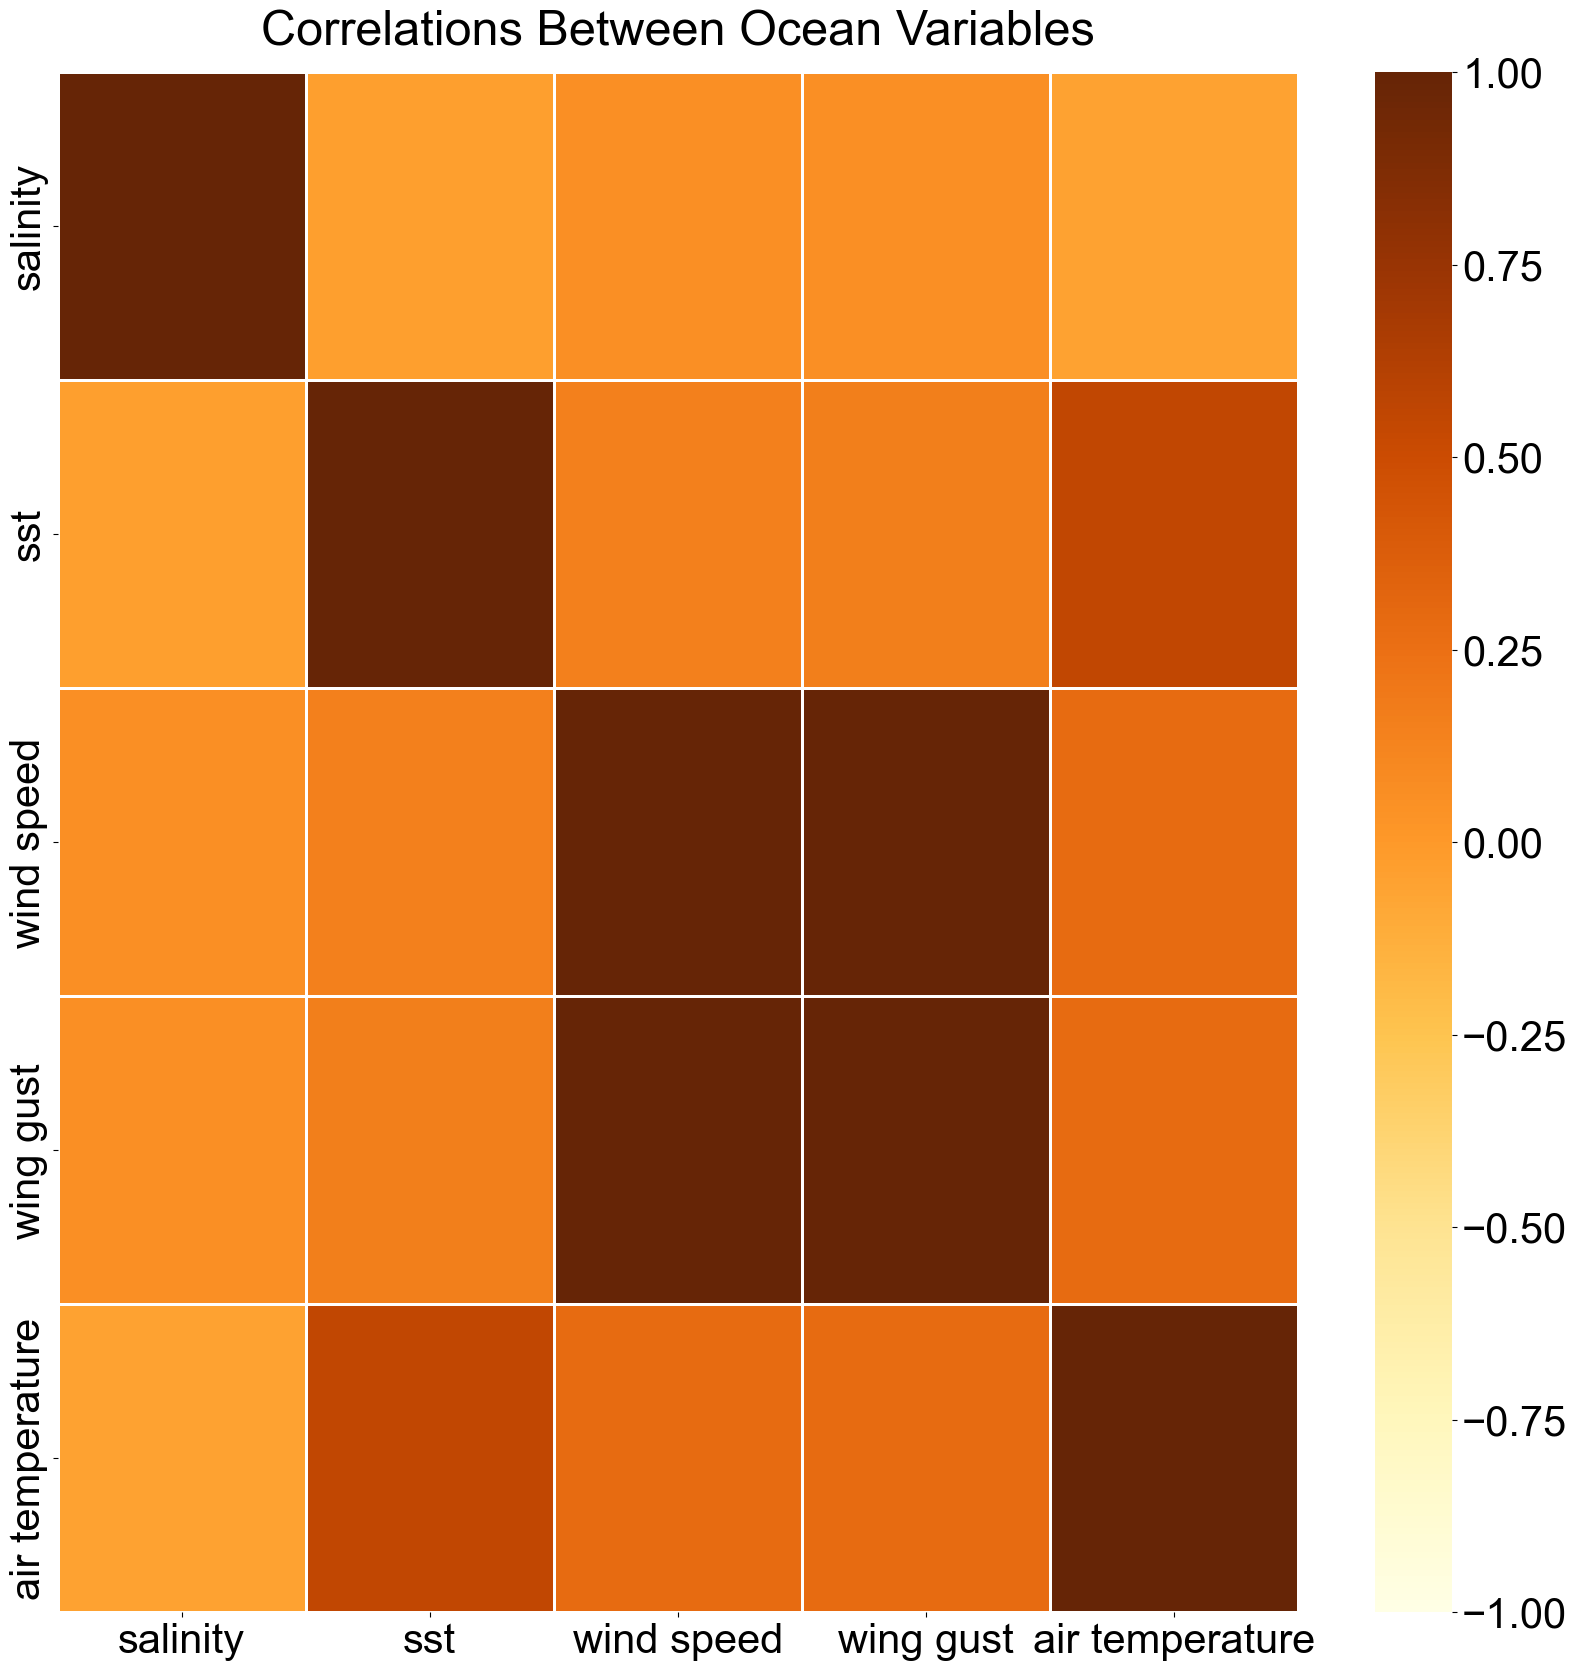

In [19]:
corr_mat = df_filled.corr().to_numpy()
rcParams['figure.figsize'] = 20,20
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

labels = ['salinity', 'sst', 'wind speed','wing gust', 'air temperature']
heatmap = sns.heatmap(corr_mat,cmap="YlOrBr", vmin=-1, vmax=1, yticklabels=labels,xticklabels=labels, linewidths=1)

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)

heatmap.tick_params(axis='both', which='both', labelsize=30)
plt.title('Correlations Between Ocean Variables',fontsize=35,pad=20)

In [20]:
pdist = spc.distance.pdist(corr_mat)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')
cluster_vector = np.concatenate((np.argwhere(idx==1), np.argwhere(idx==2),np.argwhere(idx==3),np.argwhere(idx==4)))
corr_mat_clustered = np.copy(corr_mat)
for i in range(len(corr_mat)):
    for j in range(len(corr_mat)):
        corr_mat_clustered[i,j] = corr_mat[cluster_vector[i],cluster_vector[j]]


C:\Users\sripr\AppData\Local\Temp\ipykernel_28868\2020877353.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  corr_mat_clustered[i,j] = corr_mat[cluster_vector[i],cluster_vector[j]]


In [24]:
cluster_vector_lst = cluster_vector.tolist()
labels_clustered = [labels[cluster_vector_lst[0][0]],
                    labels[cluster_vector_lst[1][0]],
                    labels[cluster_vector_lst[2][0]],
                    labels[cluster_vector_lst[3][0]],
                    labels[cluster_vector_lst[4][0]]]
                   
labels_clustered


['wind speed', 'wing gust', 'sst', 'air temperature', 'salinity']

Text(0.5, 1.0, 'Correlations Between Behaviors in Sur/Pachon F2 Hybrids')

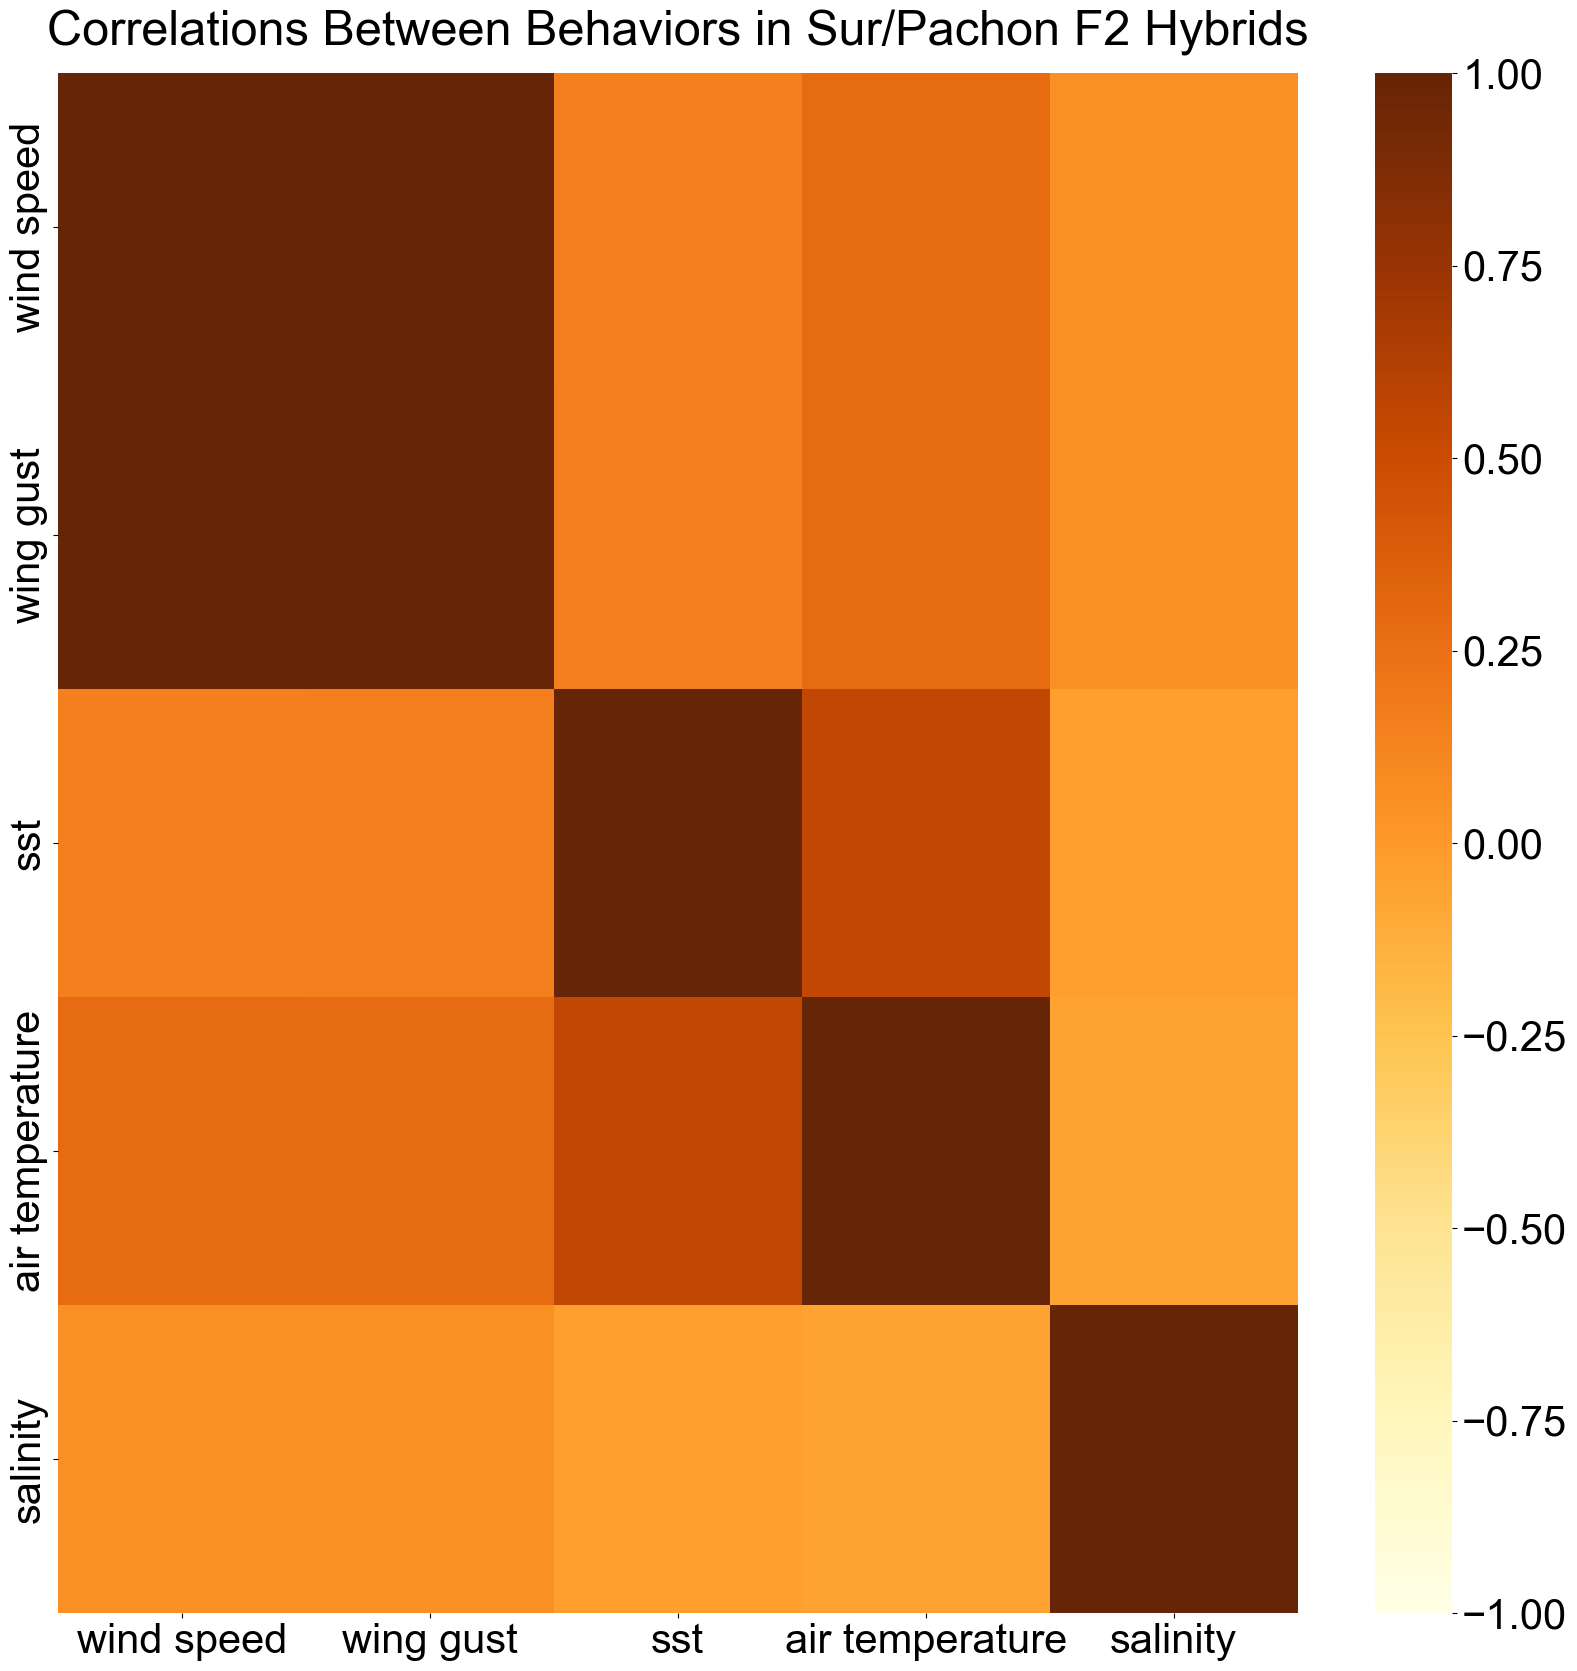

In [25]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']



heatmap = sns.heatmap(corr_mat_clustered,cmap="YlOrBr", vmin=-1, vmax=1,yticklabels=labels_clustered,xticklabels=labels_clustered)

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)


heatmap.tick_params(axis='both', which='both', labelsize=30)
plt.title('Correlations Between Behaviors in Sur/Pachon F2 Hybrids',fontsize=35,pad=20)


In [183]:


STID_baselines = [7,6,9]
STID1_baselines = [8,14,11]
STID2_baselines = [8,11,8]
Barry_avg_spd = (25+30+30+35+35+40+45+45+50+55+60+60+65+65+60+50+40+35+35+25+25+20+20+15+15)/25
Marco_avg_spd = (30+30+30+30+30+35+40+55+55+55+60+65+65+55+50+45+40+35+25+20+20)/21
Ida_avg_spd = (30+35+40+45+55+70+70+70+70+70+80+90+115+130+130+125+105+65+40+35+30+25+25+20+20+20+25+30+35+40+40+40+40+45+45+45+45+40+35+30)/40

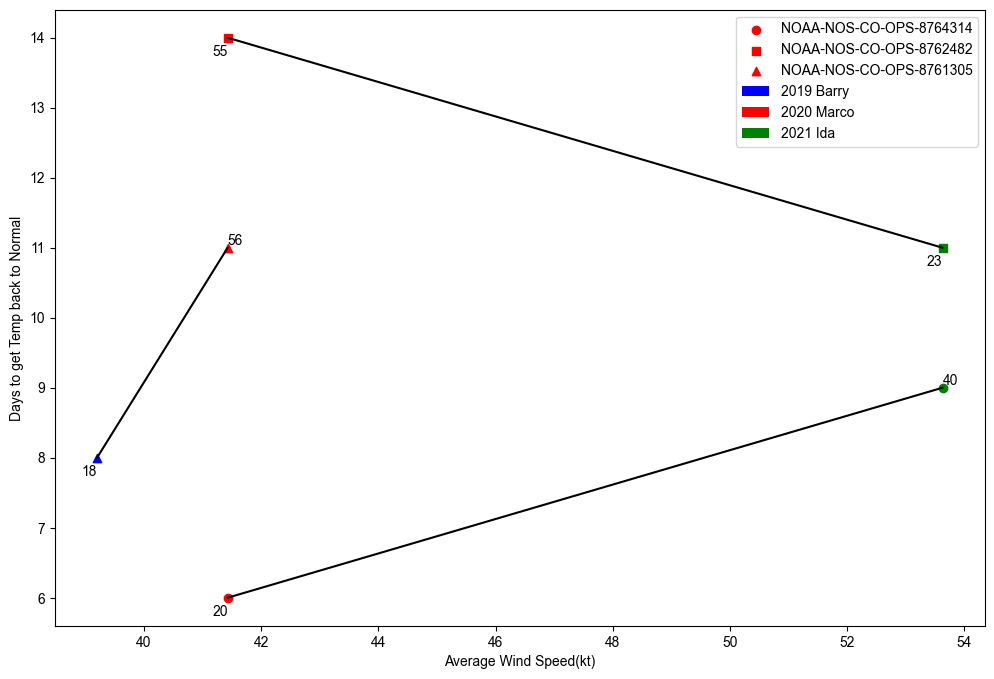

In [211]:
from matplotlib.patches import Patch
markers = ['o', 's', '^']
plt.figure(figsize=(12, 8))


plt.scatter(Barry_avg_spd, STID2_baselines[0],color='blue', marker=markers[2])
plt.text(Barry_avg_spd, STID2_baselines[0] - 0.2, s=18, ha='right', va='center')

plt.scatter(Marco_avg_spd, STID_baselines[1],label=STID,color='red', marker=markers[0])
plt.text(Marco_avg_spd, STID_baselines[1] - 0.2, s=20, ha='right', va='center')



plt.scatter(Marco_avg_spd, STID1_baselines[1],label=STID1,color='red', marker=markers[1])
plt.text(Marco_avg_spd, STID1_baselines[1] - 0.2, s=55, ha='right', va='center')

plt.scatter(Marco_avg_spd, STID2_baselines[1],label=STID2,color='red', marker=markers[2])
plt.text(Marco_avg_spd, STID2_baselines[1] + 0.1, s=56, ha='left', va='center')



plt.scatter(Ida_avg_spd, STID_baselines[2],color='green', marker=markers[0])
plt.text(Ida_avg_spd, STID_baselines[2] + 0.1, s=40, ha='left', va='center')

plt.scatter(Ida_avg_spd, STID1_baselines[2],color='green', marker=markers[1])
plt.text(Ida_avg_spd, STID1_baselines[2] - 0.2, s=23, ha='right',va='center')


plt.plot([Barry_avg_spd, Marco_avg_spd], [STID2_baselines[0], STID2_baselines[1]], color='black')
plt.plot([Marco_avg_spd, Ida_avg_spd], [STID_baselines[1], STID_baselines[2]], color='black')
plt.plot([Marco_avg_spd, Ida_avg_spd], [STID1_baselines[1], STID1_baselines[2]], color='black')

handles, labels = plt.gca().get_legend_handles_labels()

# Create custom legend entries for years
legend_elements = [
    Patch(facecolor='blue', label='2019 Barry'),
    Patch(facecolor='red', label='2020 Marco'),
    Patch(facecolor='green', label='2021 Ida'),
]

# Adding the combined legend with specified handles and labels
handles.extend(legend_elements)
labels.extend(['2019 Barry', '2020 Marco', '2021 Ida'])  # Add labels for the custom legend entries

# Plotting the combined legend
plt.legend(handles=handles, labels=labels, loc='upper right')

plt.xlabel('Average Wind Speed(kt)')
plt.ylabel('Days to get Temp back to Normal')
plt.show()

In [233]:
STID_baselines = [7,6,9]
STID1_baselines = [8,14,11]
STID2_baselines = [8,11,8]
Barry_avg_prs = 1002.76
Marco_avg_prs = 1002.63
Ida_avg_prs = 986.46
Barry_avg_spd = (25+30+30+35+35+40+45+45+50+55+60+60+65+65+60+50+40+35+35+25+25+20+20+15+15)/25
Marco_avg_spd = (30+30+30+30+30+35+40+55+55+55+60+65+65+55+50+45+40+35+25+20+20)/21
Ida_avg_spd = (30+35+40+45+55+70+70+70+70+70+80+90+115+130+130+125+105+65+40+35+30+25+25+20+20+20+25+30+35+40+40+40+40+45+45+45+45+40+35+30)/40

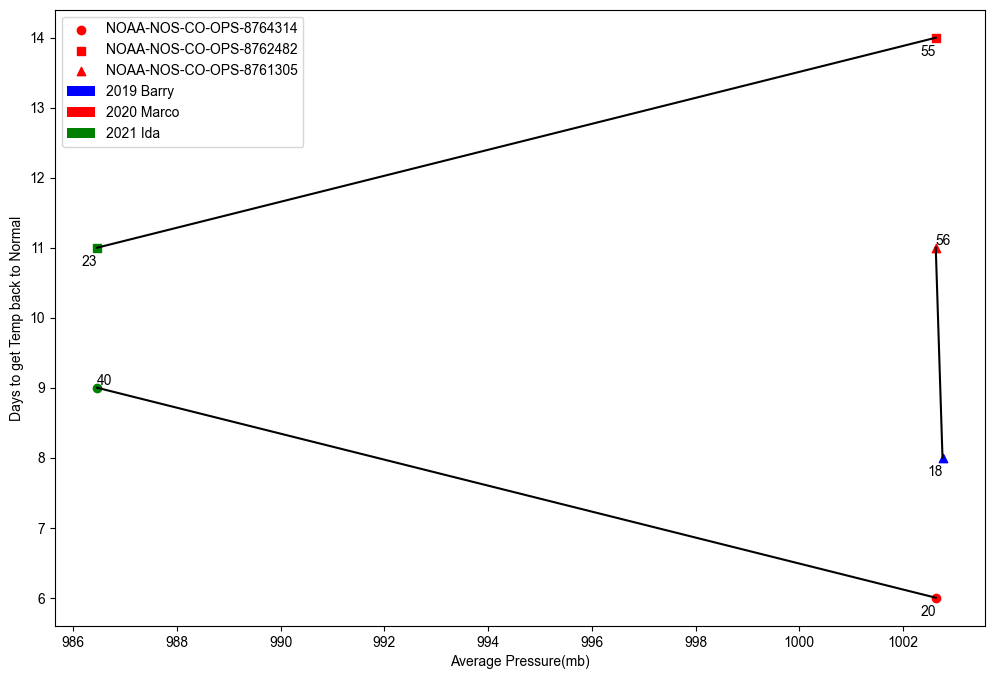

In [214]:
from matplotlib.patches import Patch
markers = ['o', 's', '^']
plt.figure(figsize=(12, 8))


plt.scatter(Barry_avg_prs, STID2_baselines[0],color='blue', marker=markers[2])
plt.text(Barry_avg_prs, STID2_baselines[0] - 0.2, s=18, ha='right', va='center')

plt.scatter(Marco_avg_prs, STID_baselines[1],label=STID,color='red', marker=markers[0])
plt.text(Marco_avg_prs, STID_baselines[1] - 0.2, s=20, ha='right', va='center')



plt.scatter(Marco_avg_prs, STID1_baselines[1],label=STID1,color='red', marker=markers[1])
plt.text(Marco_avg_prs, STID1_baselines[1] - 0.2, s=55, ha='right', va='center')

plt.scatter(Marco_avg_prs, STID2_baselines[1],label=STID2,color='red', marker=markers[2])
plt.text(Marco_avg_prs, STID2_baselines[1] + 0.1, s=56, ha='left', va='center')



plt.scatter(Ida_avg_prs, STID_baselines[2],color='green', marker=markers[0])
plt.text(Ida_avg_prs, STID_baselines[2] + 0.1, s=40, ha='left', va='center')

plt.scatter(Ida_avg_prs, STID1_baselines[2],color='green', marker=markers[1])
plt.text(Ida_avg_prs, STID1_baselines[2] - 0.2, s=23, ha='right',va='center')


plt.plot([Barry_avg_prs, Marco_avg_prs], [STID2_baselines[0], STID2_baselines[1]], color='black')
plt.plot([Marco_avg_prs, Ida_avg_prs], [STID_baselines[1], STID_baselines[2]], color='black')
plt.plot([Marco_avg_prs, Ida_avg_prs], [STID1_baselines[1], STID1_baselines[2]], color='black')

handles, labels = plt.gca().get_legend_handles_labels()

# Create custom legend entries for years
legend_elements = [
    Patch(facecolor='blue', label='2019 Barry'),
    Patch(facecolor='red', label='2020 Marco'),
    Patch(facecolor='green', label='2021 Ida'),
]

# Adding the combined legend with specified handles and labels
handles.extend(legend_elements)
labels.extend(['2019 Barry', '2020 Marco', '2021 Ida'])  # Add labels for the custom legend entries

# Plotting the combined legend
plt.legend(handles=handles, labels=labels, loc='upper left')

plt.xlabel('Average Pressure(mb)')
plt.ylabel('Days to get Temp back to Normal')
plt.show()

In [215]:

STID1_baselines = [2,6,5]

Barry_avg_prs = 1002.76
Marco_avg_prs = 1002.63
Ida_avg_prs = 986.46

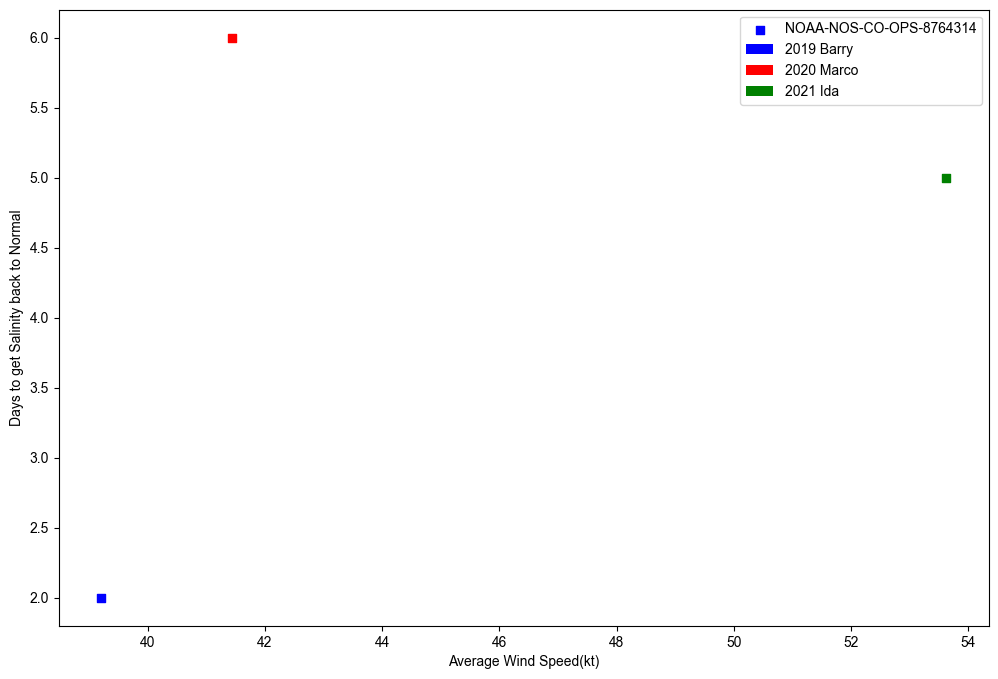

In [225]:
from matplotlib.patches import Patch
markers = ['o', 's', '^']
plt.figure(figsize=(12, 8))

plt.scatter(Barry_avg_spd, STID1_baselines[0], label=STID,color='blue', marker=markers[1])


plt.scatter(Marco_avg_spd, STID1_baselines[1],color='red', marker=markers[1])


plt.scatter(Ida_avg_spd, STID1_baselines[2],color='green', marker=markers[1])


handles, labels = plt.gca().get_legend_handles_labels()

# Create custom legend entries for years
legend_elements = [
    Patch(facecolor='blue', label='2019 Barry'),
    Patch(facecolor='red', label='2020 Marco'),
    Patch(facecolor='green', label='2021 Ida'),
]

# Adding the combined legend with specified handles and labels
handles.extend(legend_elements)
labels.extend(['2019 Barry', '2020 Marco', '2021 Ida'])  # Add labels for the custom legend entries

# Plotting the combined legend
plt.legend(handles=handles, labels=labels, loc='upper right')

plt.xlabel('Average Wind Speed(kt)')
plt.ylabel('Days to get Salinity back to Normal')
plt.show()

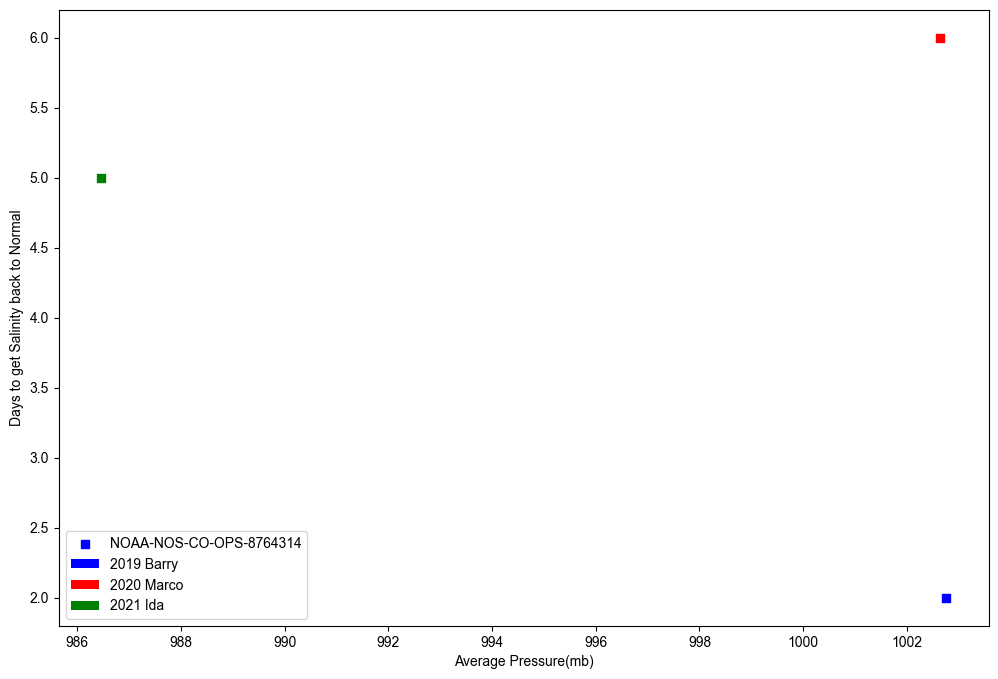

In [224]:
from matplotlib.patches import Patch
markers = ['o', 's', '^']
plt.figure(figsize=(12, 8))

plt.scatter(Barry_avg_prs, STID1_baselines[0], label=STID,color='blue', marker=markers[1])


plt.scatter(Marco_avg_prs, STID1_baselines[1],color='red', marker=markers[1])


plt.scatter(Ida_avg_prs, STID1_baselines[2],color='green', marker=markers[1])



handles, labels = plt.gca().get_legend_handles_labels()

# Create custom legend entries for years
legend_elements = [
    Patch(facecolor='blue', label='2019 Barry'),
    Patch(facecolor='red', label='2020 Marco'),
    Patch(facecolor='green', label='2021 Ida'),
]

# Adding the combined legend with specified handles and labels
handles.extend(legend_elements)
labels.extend(['2019 Barry', '2020 Marco', '2021 Ida'])  # Add labels for the custom legend entries

# Plotting the combined legend
plt.legend(handles=handles, labels=labels, loc='lower left')

plt.xlabel('Average Pressure(mb)')
plt.ylabel('Days to get Salinity back to Normal')
plt.show()

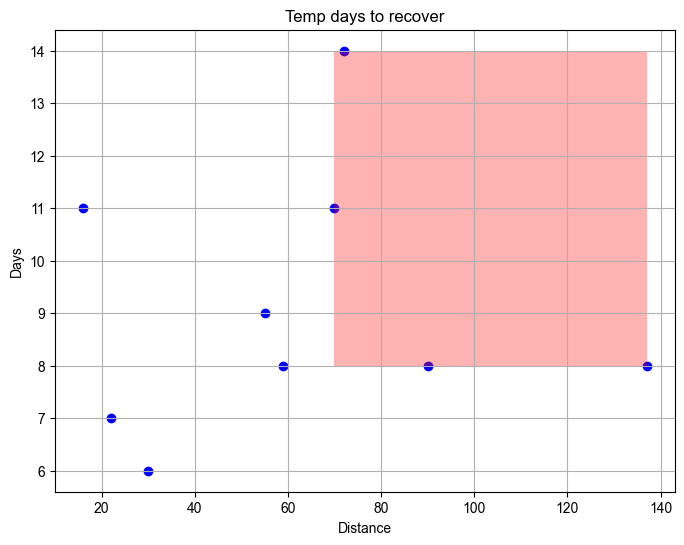

In [319]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

distance = [30, 22, 55, 90, 72, 16, 137, 70, 59]
days = [6, 7, 9, 8, 14, 11, 8, 11, 8]

plt.figure(figsize=(8, 6))
plt.scatter(distance, days, color='blue', marker='o')
plt.xlabel('Distance')
plt.ylabel('Days')
plt.title('Temp days to recover')
plt.grid(True)

# Coordinates of the bounding box (indices 4 to 7)
x_coords = distance[6:8]
y_coords = days[4:8]

# Plotting the bounding box around the points on the right with shading
rect = Rectangle((min(x_coords), min(y_coords)), max(x_coords) - min(x_coords), max(y_coords) - min(y_coords),
                 linewidth=0, edgecolor='red', facecolor='red', alpha=0.3)  # Adjust alpha for transparency

plt.gca().add_patch(rect)
plt.show()


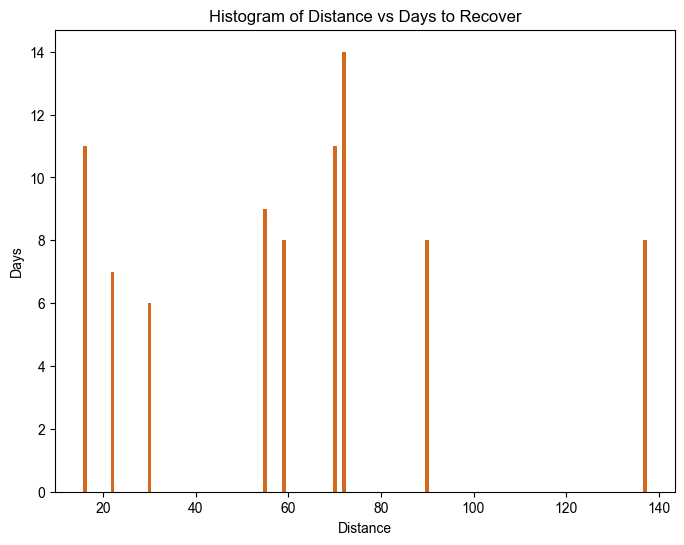

In [301]:
import matplotlib.pyplot as plt

distance = [30, 22, 55, 90, 72, 16, 137, 70, 59]
days = [6, 7, 9, 8, 14, 11, 8, 11, 8 ]

plt.figure(figsize=(8, 6))
plt.bar(distance, days, color = "Chocolate")
plt.xlabel('Distance')
plt.ylabel('Days')
plt.title('Histogram of Distance vs Days to Recover')


plt.show()
